In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_hechos = pd.read_csv('data_hechos.csv')
data_victimas = pd.read_csv('data_victimas.csv')

- Estadistica Descriptiva

In [13]:
data_hechos['N_VICTIMAS'].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

El campo N_VICTIMAS representa el numero de victimas por cada incidente registrado en estos datos.
La informacion anterior hace referencia a los datos estadisticos del numero de victimas, en el que hay 696 registros y siendo 1 la menor cantidad de victimas y 3 la mayor cantidad. 

In [14]:
data_victimas['EDAD'].describe()

count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64

Las estadisticas de este campo muestra 664 registros de edades de las victimas donde en promedio la edad de personas afectadas por los incidentes es de 42 años, tambien la edad menor es de 19 años y la mayor de 95 años

- Representacion Grafica de variables

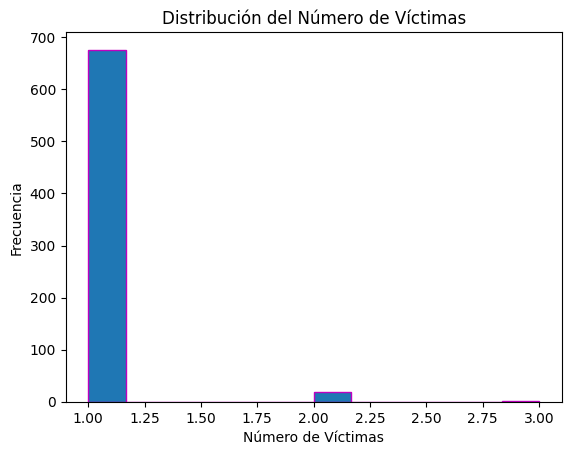

In [59]:

# Histograma de número de víctimas
plt.hist(data_hechos['N_VICTIMAS'], bins=12, edgecolor='m')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Víctimas')
plt.show()

Se explora la distribución del número de víctimas en los siniestros viales.
se observa con claridad que 1 victima es el numero de mayor frecuencia en accidentes de trafico en relacion con el total de hechos en esos 6 años.

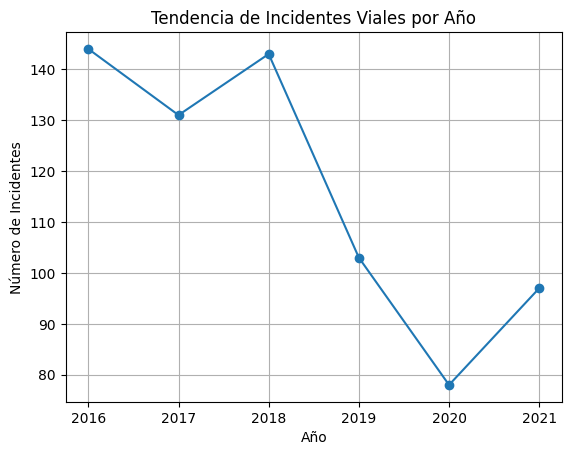

In [12]:
data_hechos['FECHA'] = pd.to_datetime(data_hechos['AAAA'].astype(str) + '-' + 
                                      data_hechos['MM'].astype(str) + '-' + 
                                      data_hechos['DD'].astype(str))

# Contar los incidentes por año
incidentes_por_anio = data_hechos['FECHA'].dt.year.value_counts().sort_index()

# Graficar la serie de tiempo
plt.plot(incidentes_por_anio.index, incidentes_por_anio.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.title('Tendencia de Incidentes Viales por Año')
plt.grid(True)
plt.show()

Una serie de tiempo para ver cómo varían los incidentes a lo largo del tiempo. la grafica muestra que en el periodo de años comprendido entre 2016 a 2021, los años con mayor cantidad de incidentes son 2016 y 2018 con mas de 140. Despues de 2018 hasta 2020 se presenta una disminucion considerable con una cantidad de hechos menores a 80.

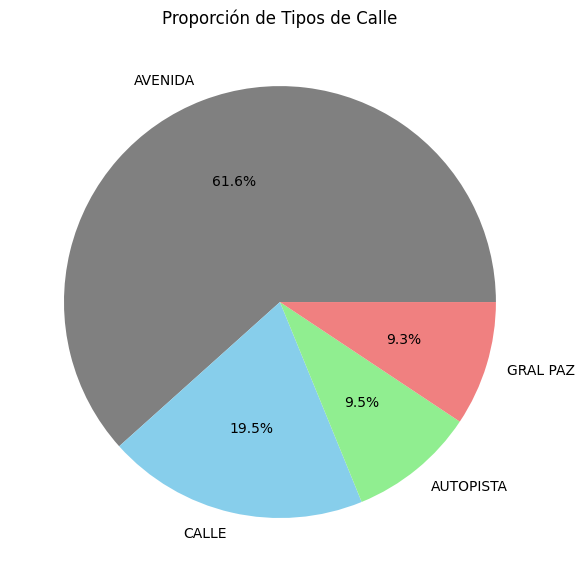

In [68]:

# Crea un gráfico de pastel para la columna 'TIPO_DE_CALLE'
plt.figure(figsize=(6, 6))
data_hechos['TIPO_DE_CALLE'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['grey','skyblue', 'lightgreen', 'lightcoral'])

# Personaliza el gráfico
plt.title('Proporción de Tipos de Calle')
plt.ylabel('')

# Muestra el gráfico
plt.tight_layout()
plt.show()


Esta visualizacion representa el campo 'TIPO DE CALLE' de los datos, nos brinda informacion del tipo de via donde ocurren los siniestros. Este grafico circular refleja que la principal via donde se presentan los accidentes es en la avenida con el 61,6% de los hechos, la segunda via resulta ser la calle con el 19,5% y los demas incidentes se presentan la Autopista y Gral Paz con 9.5% y 9.3% respectivamente.

<Figure size 1200x600 with 0 Axes>

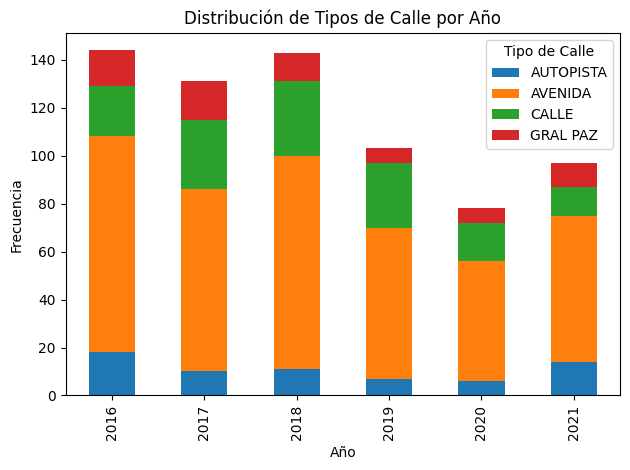

In [52]:

# Crea un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
data_hechos.groupby(['AAAA', 'TIPO_DE_CALLE']).size().unstack().plot(kind='bar', stacked=True)

# Personaliza el gráfico
plt.title('Distribución de Tipos de Calle por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Calle')

# Muestra el gráfico
plt.tight_layout()
plt.show()


En este grafico se relacionan las variables Tipo de Calle y Años. Esta realiza una distribccion de los tipos de calle donde ocurren los accidentes por año. Como se observa en las barras atraves de los años hay mayor frecuencia de accidentalidad en la Avenidad que en una Calle en la ciudad de Buenos Aires. Ademas se puede inferir que haya una menor probabilidad que se presnte un siniestro vial en la Gral Paz.

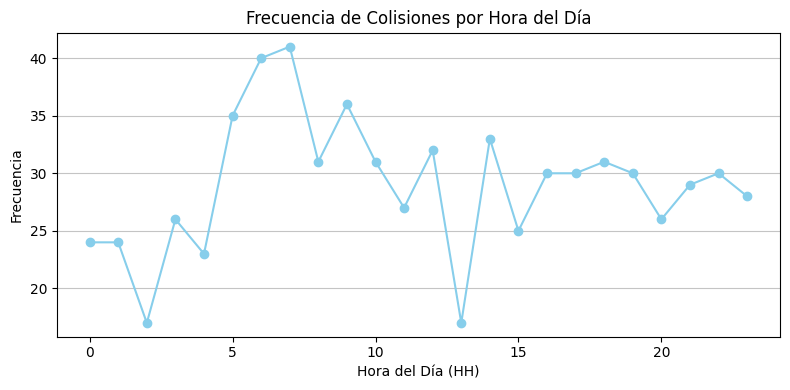

In [70]:

# Crea un gráfico de líneas para la columna 'HH'
plt.figure(figsize=(8, 4))
data_hechos['HH'].value_counts().sort_index().plot(kind='line', marker='o', color='skyblue')

# Personaliza el gráfico
plt.title('Frecuencia de Colisiones por Hora del Día')
plt.xlabel('Hora del Día (HH)')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

La columna 'HH' representa la franja horaria en el que ocurre los incidentes, por lo tanto este grafico de lineas muestra la frecuencia en la que se presentan en determinada hora del dia. Se puede Observar que desde las 00:00 hasta las 5:00 de la madrugada son las horas donde es baja la accidentalidad debido a la poco circulacion de vehiculos. Ademas despues de las 5 hasta aproxidamente las 15 horas hay gran variabilida de frecuencia de siniestros en la ciudad, pueden aumentar como tambien disminuir en estas horas. Una situacion a destacar es la tendencia lineal de frecuencia que se presentan incidentes despues de las 15 horas hasta el final del dia.  

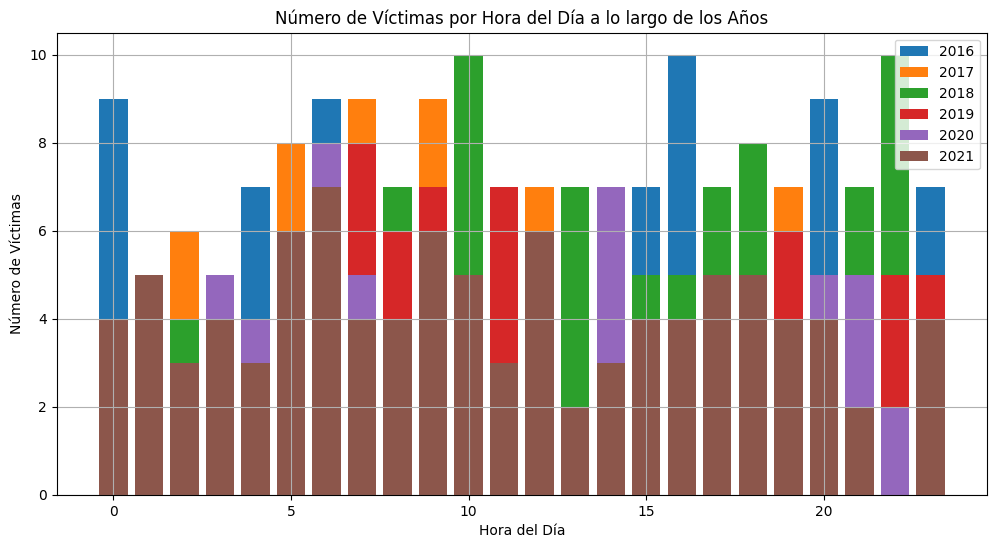

In [75]:
# Agrupar los datos por año (AAAA) y hora del día (HH), contando el número de víctimas
data_grouped = data_hechos.groupby(['AAAA', 'HH'])['VICTIMA'].count().reset_index()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
for year in data_grouped['AAAA'].unique():
    data_year = data_grouped[data_grouped['AAAA'] == year]
    plt.bar(data_year['HH'], data_year['VICTIMA'], label=str(year))

plt.xlabel('Hora del Día')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Hora del Día a lo largo de los Años')
plt.legend()
plt.grid(True)
plt.show()


En este gráfico de barras apiladas donde cada barra representa una hora del día y las diferentes colores representen los años. Se permite visualizar cómo varía el número de víctimas a lo largo de las horas del día y a lo largo de varios años. 
Se puede observar que en las hora 05:00 hasta las 10:00 se registran mayor numero de victimas que se registraron en los años 2016, 2017 y 2018.
El año con mayor incidentes fue el 2018, año en el que sus mayores registros fueron en la franjna horaria de las 10:00.
 El año 2021 es el año con menor cantidad de victimas en cualquier franja horaria donde se resalta que la franja horaria de las 06:00 es la que mayor cantidad de victimas registra.

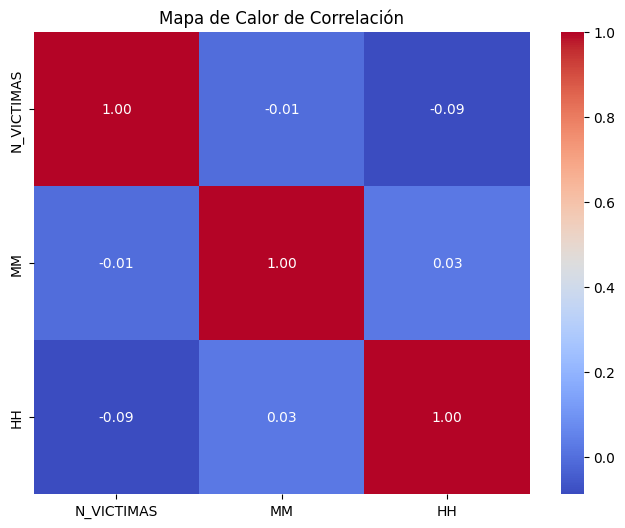

In [71]:

# Selecciona las columnas numéricas para calcular la matriz de correlación
columnas_numericas = ['N_VICTIMAS', 'MM', 'HH']

# Calcula la matriz de correlación
matriz_correlacion = data_hechos[columnas_numericas].corr()

# Crea un mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()


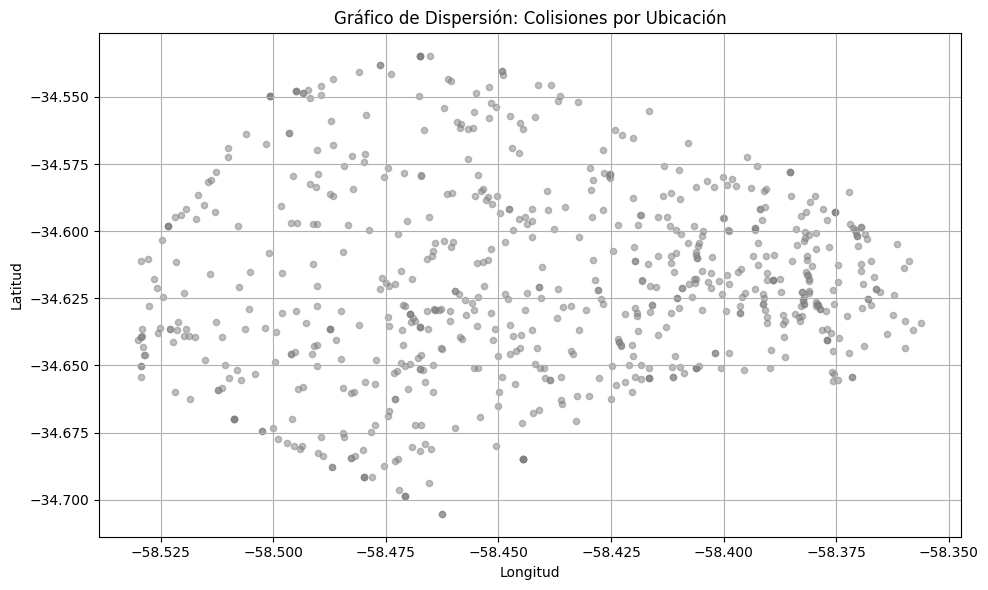

In [72]:

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Utiliza el método scatter para crear el gráfico de dispersión
plt.scatter(data_hechos['pos x'], data_hechos['pos y'], color='grey', alpha=0.5, s=20)  # s ajusta el tamaño de los puntos

# Personaliza el gráfico
plt.title('Gráfico de Dispersión: Colisiones por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()

# Muestra el gráfico
plt.tight_layout()
plt.show()


Este grafico de dispersion ilustra los puntos especificos de accidentes en la ciudad de Buenos Aires y como estan replgados los hechos alrededor de la ciudad. Se puede mirar que muchos de los incidentes estan muy cercas de otros, lo que implica que estos no solo ocuerren en determinada zona de la ciudad sino que cubren cada espacio de la ciudad.

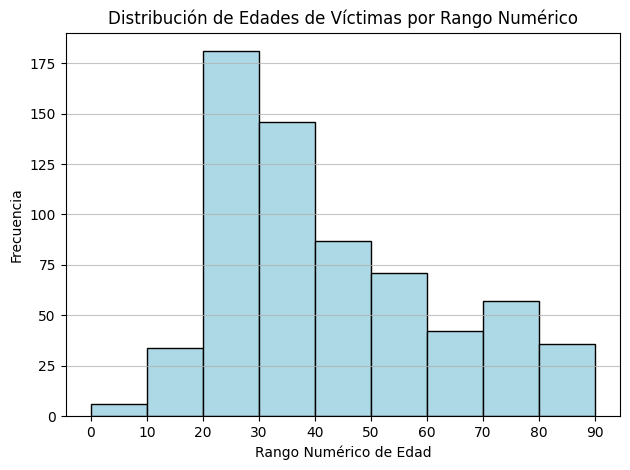

In [69]:
# Convierte la columna 'EDAD' a tipo numérico (pueden haber valores no numéricos)
data_victimas['EDAD'] = pd.to_numeric(data_victimas['EDAD'], errors='coerce')

# Filtra los valores no nulos en la columna 'EDAD'
edades_validas = data_victimas['EDAD'].dropna()

# Define los rangos de edades numéricos
rangos_edades = [0, 10, 20, 30, 40, 50, 60, 70, 80,90]

# Crea el histograma de frecuencia de edades con rangos numéricos
plt.hist(edades_validas, bins=rangos_edades, color='lightblue', edgecolor='black')

# Personaliza el gráfico
plt.title('Distribución de Edades de Víctimas por Rango Numérico')
plt.xlabel('Rango Numérico de Edad')
plt.ylabel('Frecuencia')

# Etiqueta los ejes con los rangos numéricos
plt.xticks(rangos_edades)

# Muestra el gráfico
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()




Estos datos suministrados respecto a victimas, se visualiza una distribuccion por rango de edades. esta visualizacion refleja que las edades entre 20 y 40 años tienen una mayor frecuencia de incidentes viales, siendo personas entre  20 a 30 años las de mayor probabilidad de estar involucrados en este tipo de accidentes. 

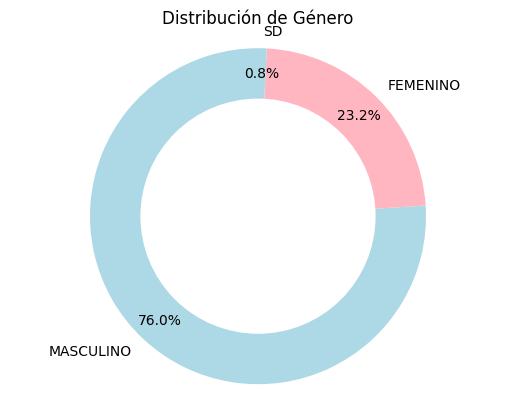

In [15]:
# Contar las ocurrencias de género
sexo_counts = data_victimas['SEXO'].value_counts()

# Crear una figura y ejes
fig, ax = plt.subplots()

# Datos para el gráfico
labels = sexo_counts.index
sizes = sexo_counts.values
colors = ['lightblue', 'lightpink']  # Colores para las secciones

# Crear el donut chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Dibuja un círculo blanco en el centro para hacerlo parecer un donut
circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(circle)

# Añadir un título
plt.title('Distribución de Género')

# Mostrar el gráfico
plt.axis('equal')  # Esto asegura que el gráfico se muestre como un círculo
plt.show()


Esta visualizacion de 'donat' discrimina los generos en los registros de siniestros en la ciudad de Buenos Aires. En el cual se observa que predomina el genero Masculino con 76% sobre el Femenino con    23.2% , esto se puede sustentar debido a que hay una mayor cantidad de hombres conductores que Mujeres conductoras.   

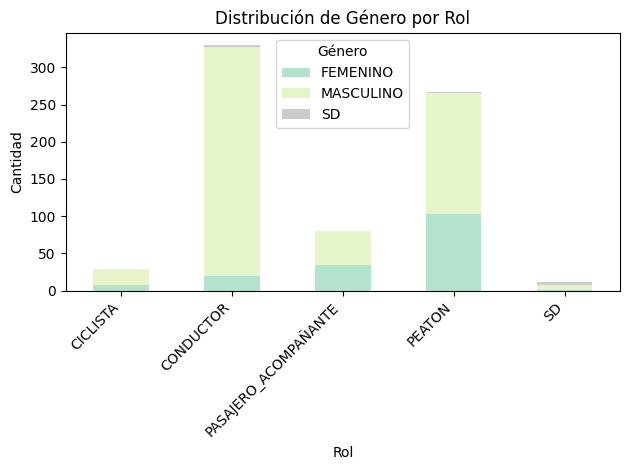

In [16]:
# Crear una tabla de contingencia para contar las ocurrencias de género por rol
contingency_table = pd.crosstab(data_victimas['ROL'], data_victimas['SEXO'])

# Crear el gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, colormap='Pastel2')

# Personalizar el gráfico
plt.title('Distribución de Género por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
plt.legend(title='Género')
plt.tight_layout()
plt.show()


En este grafico relacionamos el genero con los roles de victimas, los cuales son Ciclista, Conductor, Pasajero y Peaton, donde se puede contastar que los Conductores son de mayoria Masculino y este rol segun los registro es la victima mayor de los siniestros viales con mas de 300 incidentes en estos años, por encima de roles como ser peaton. 

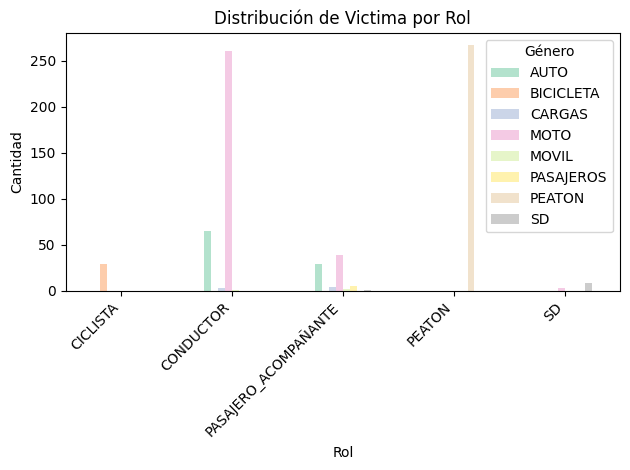

In [20]:
# Crear una tabla de contingencia para contar las ocurrencias de género por rol
contingency_table = pd.crosstab(data_victimas['ROL'], data_victimas['VICTIMA'])

# Crear el gráfico de barras agrupadas
contingency_table.plot(kind='bar', colormap='Pastel2')

# Personalizar el gráfico
plt.title('Distribución de Victima por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
plt.legend(title='Género')
plt.tight_layout()
plt.show()


Esta visualizacion detalla el rol de la victima de un incidente y el vehiculo en el que se presento el hecho. Vehiculos tales como Auto, Moto, Bicicleta, de cargas y Movil, en los casos de Pasajeros y Peatones que resultaron ser victimas o afectados de algun accidente.
Se refleja en la grafica que las victimas en el vehiculo Moto son la de mayor cantidad de accidentes en la ciudad de Buenas Aires por lo tanto representa el mayor peligro circulacion en las vias en comparacion a circular en un Auto. 

<Figure size 1000x600 with 0 Axes>

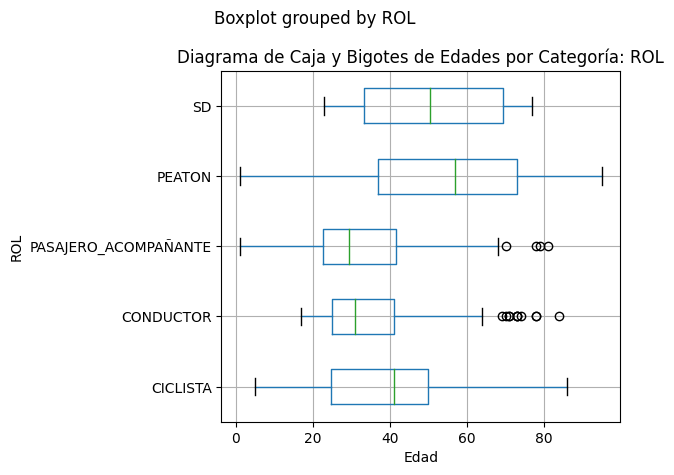

In [24]:
# Convierte la columna 'EDAD' a tipo numérico (pueden haber valores no numéricos)
data_victimas['EDAD'] = pd.to_numeric(data_victimas['EDAD'], errors='coerce')

# Filtra los valores no nulos en la columna 'EDAD'
edades_validas = data_victimas['EDAD'].dropna()

# Categoría por la que deseas agrupar (por ejemplo, 'ROL' o 'SEXO')
categoria = 'ROL'

# Crea el diagrama de caja y bigotes agrupado por la categoría seleccionada
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

data_victimas.boxplot(column='EDAD', by=categoria, vert=False)

# Personaliza el gráfico
plt.title('Diagrama de Caja y Bigotes de Edades por Categoría: {}'.format(categoria))
plt.xlabel('Edad')
plt.ylabel(categoria)

# Muestra el gráfico
plt.tight_layout()
plt.show()


Esta grafica boxplot se utiliza para visualizar la distribucion de la edad de las victimas dependiendo su rol. Observamos en las victimas peaton que el 50% central de los datos se concentra en las edades entre 38 y 70 años aproximadamente.
En las victimas pasajero el 50% central de los datos se concentra en una edad mayor a 20 y 40 años, tambien contiene valores atipicos superior a los 80 años.
En las victimas conductores la edad estan comprendidas entre 18 y 65 aproximadamente y el 50% cenral de los datos entre 25 y 40, ademas contiene outlier superiores a los 65 años. 
En el ciclista contiene un rango de edad mayor a los 5  y menor a los 95, donde el 50% de los datos se centre la edad mayor 25 y 50. 